# Code to view runoff onset maps

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import xarray as xr
import contextily as ctx
import matplotlib.pyplot as plt
from global_snowmelt_runoff_onset.config import Config, Tile

In [2]:
config = Config('../config/global_config.txt')

Configuration loaded:
resolution = 0.00072000072000072
spatial_chunk_dim = 2048
bbox_left = -179.999
bbox_right = 179.999
bbox_top = 81.099
bbox_bottom = -59.999
wy_start = 2015
wy_end = 2024
low_backscatter_threshold = 0.001
min_monthly_acquisitions = 2
max_allowed_days_gap_per_orbit = 30
min_years_for_median_std = 3
valid_tiles_geojson_path = ../processing/valid_tiles.geojson
tile_results_path = ../processing/tile_results.csv
global_runoff_zarr_store_azure_path = snowmelt/snowmelt_runoff_onset/global.zarr
seasonal_snow_mask_zarr_store_azure_path = snowmelt/snow_mask_v2/global_modis_snow_mask.zarr


In [3]:
config.valid_tiles_gdf.explore(column='success',cmap=['red','green'])

In [4]:
global_ds = xr.open_zarr(config.global_runoff_store, consolidated=True, decode_coords='all')

def view_tile(tile: Tile):


    test_ds = global_ds.rio.clip_box(*tile.get_geobox().boundingbox,crs='EPSG:4326')
    test_ds = test_ds.rio.reproject(test_ds.rio.estimate_utm_crs())

    f,axs=plt.subplots(1,2,figsize=(10,5))
    test_ds['runoff_onset_median'].plot(ax=axs[0],vmin=0,vmax=365)
    axs[0].set_title('2015-2024 median snowmelt runoff onset')

    test_ds['runoff_onset_std'].plot(ax=axs[1],cmap='Reds',vmin=0,vmax=60)
    axs[1].set_title('2015-2024 std deviation snowmelt runoff onset')

    for ax in axs:
        ctx.add_basemap(ax=ax, crs=test_ds.rio.crs.to_string())
        ax.set_aspect('equal')
        

    f.tight_layout()

    test_ds['runoff_onset'].plot.imshow(col='water_year',col_wrap=5,vmin=0,vmax=365)

    (test_ds['runoff_onset']-test_ds['runoff_onset_median']).plot.imshow(col='water_year',col_wrap=5,vmin=-60,vmax=60,cmap='RdBu')

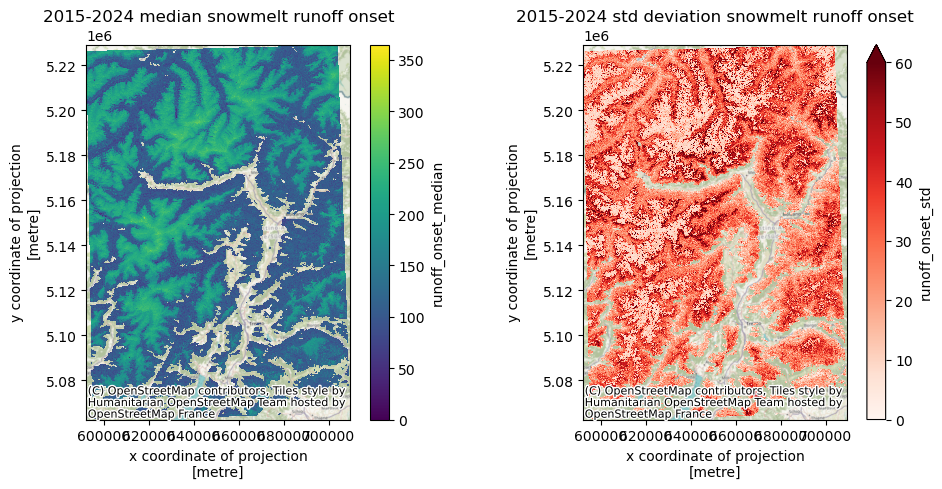

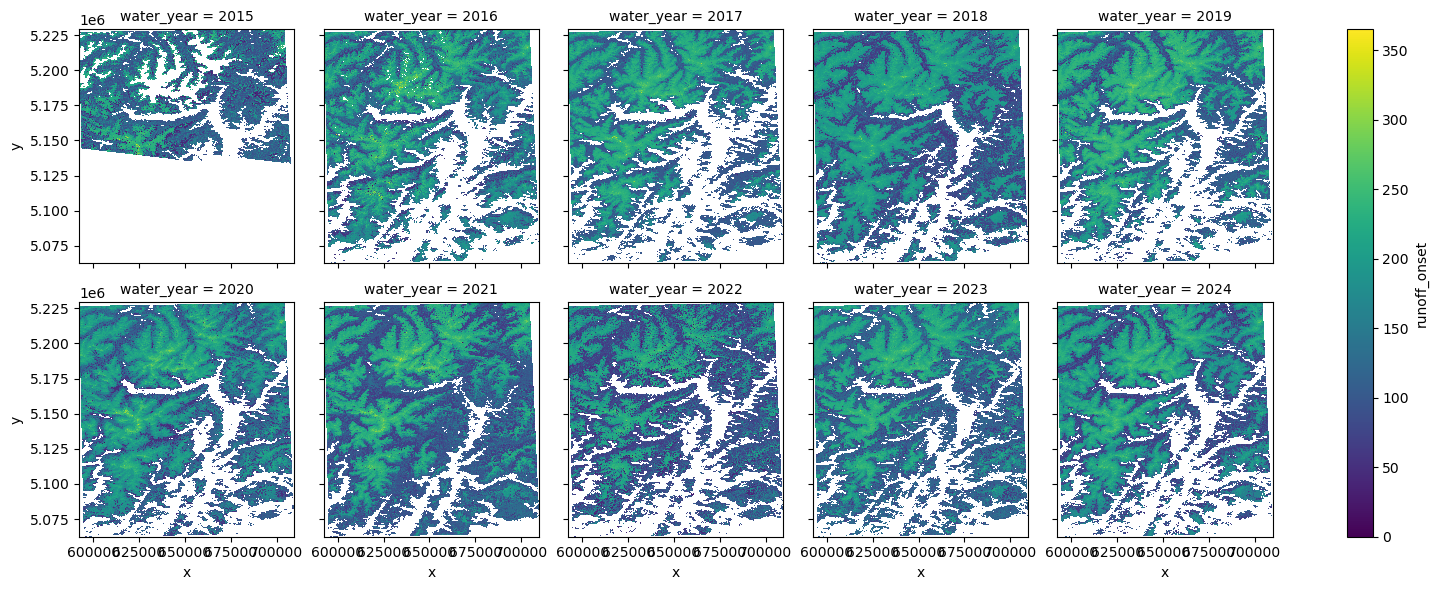

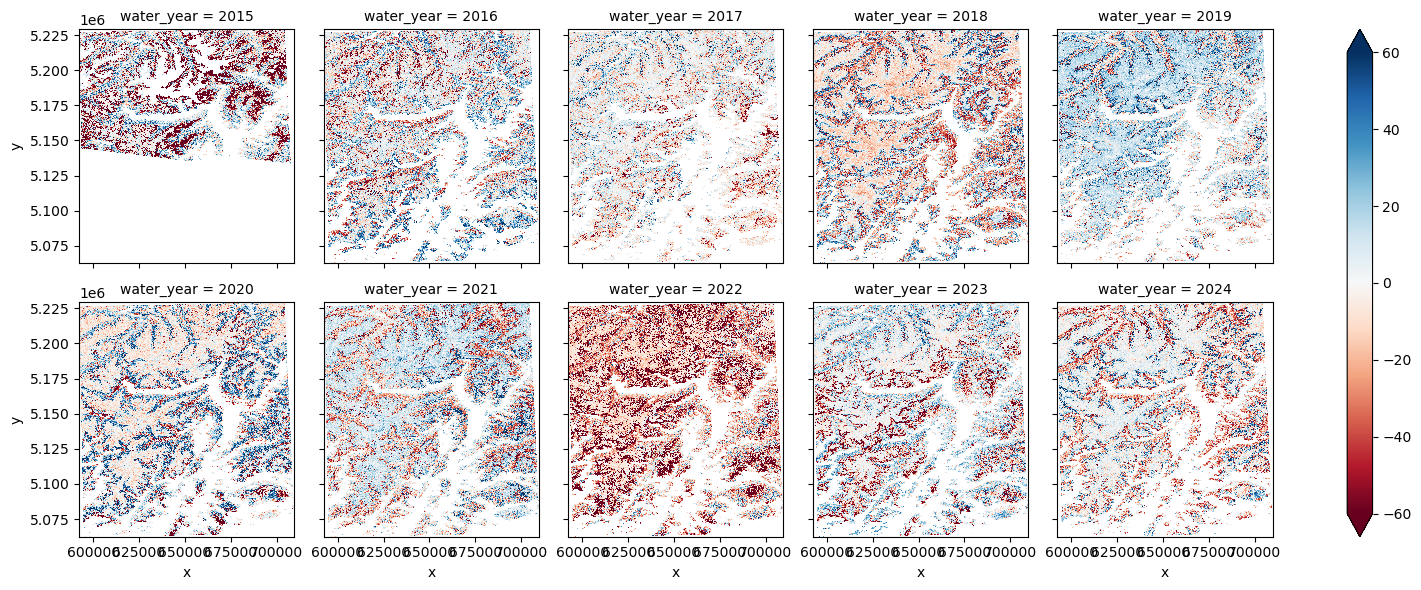

In [5]:
view_tile(Tile(23,129))

In [6]:
test_ds = global_ds.rio.clip_box(-120,30,-110,50,crs='EPSG:4326')
test_ds

<xarray.Dataset> Size: 19GB
Dimensions:              (latitude: 27779, longitude: 13890, water_year: 10)
Coordinates:
  * latitude             (latitude) float64 222kB 50.0 50.0 50.0 ... 30.0 30.0
  * longitude            (longitude) float64 111kB -120.0 -120.0 ... -110.0
  * water_year           (water_year) int64 80B 2015 2016 2017 ... 2023 2024
    spatial_ref          int64 8B 0
Data variables:
    runoff_onset         (water_year, latitude, longitude) float32 15GB dask.array<chunksize=(1, 1863, 636), meta=np.ndarray>
    runoff_onset_median  (latitude, longitude) float32 2GB dask.array<chunksize=(1863, 636), meta=np.ndarray>
    runoff_onset_std     (latitude, longitude) float32 2GB dask.array<chunksize=(1863, 636), meta=np.ndarray>
Attributes:
    processed_tiles:  []

In [ ]:
f,axs=plt.subplots(1,2,figsize=(10,10))
test_ds['runoff_onset_median'].plot(ax=axs[0],vmin=0,vmax=365)
test_ds['runoff_onset_std'].plot(ax=axs[1],cmap='Reds')

for ax in axs:
    ctx.add_basemap(ax, crs=test_ds.rio.crs.to_string())

In [ ]:
test_ds['runoff_onset'].plot.imshow(col='water_year',col_wrap=3,vmin=0,vmax=365)